In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import operator
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [5]:
url='https://raw.githubusercontent.com/saahil-jain/Benchmarking_Of_NODE/master/Time%20Series%20Forecasting/datasets/data.csv'
covid_records = pd.read_csv(url,sep=",") 
covid_records

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,05/06/2020,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
1,04/06/2020,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
2,03/06/2020,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
3,02/06/2020,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
4,01/06/2020,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
21542,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
21543,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
21544,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
21545,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


In [6]:
list_of_countries=['United_Kingdom', 'Germany', 'Spain', 'Italy', 'United_States_of_America', 'India']

CASES

In [11]:
grouped=covid_records.groupby('countriesAndTerritories')
country_population = {}
country_cases={}
for country in list_of_countries:
  country_population[country]=list(grouped.get_group(country)['popData2018'])[0]
  list_cases=list(abs(covid_records["cases"].loc[covid_records["countriesAndTerritories"]==country]))[::-1]
  length=len(list_cases)
  flag =0
  for number in list_cases:
    if number==0:
      continue
    else:
      flag=list_cases.index(number)
      break
  list_cases=list_cases[flag::]
  normalised_list_cases=[]
  for i in list_cases:
    normalised_list_cases.append((i*1000000)/country_population[country])
  list_days=list(range(flag,length))
  country_cases[country]={"cases":normalised_list_cases,"days":list_days}

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  2.0min


[09:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:39.7811
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:36.2503
[2]	validation_0-rmse:33.1096
[3]	validation_0-rmse:30.2765
[4]	validation_0-rmse:27.6781
[5]	validation_0-rmse:25.3595
[6]	validation_0-rmse:23.2705
[7]	validation_0-rmse:21.41
[8]	validation_0-rmse:19.7551
[9]	validation_0-rmse:18.3376
[10]	validation_0-rmse:17.0299
[11]	validation_0-rmse:15.8786
[12]	validation_0-rmse:14.8675
[13]	validation_0-rmse:14.0185
[14]	validation_0-rmse:13.2413
[15]	validation_0-rmse:12.5112
[16]	validation_0-rmse:11.8726
[17]	validation_0-rmse:11.3182
[18]	validation_0-rmse:10.833
[19]	validation_0-rmse:10.4144
[20]	validation_0-rmse:10.0488
[21]	validation_0-rmse:9.7279
[22]	validation_0-rmse:9.44926
[23]	validation_0-rmse:9.22507
[24]	validation_0-rmse:9.00418
[25]	validation_0-rmse:8.81383
[26]	validation

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[09:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

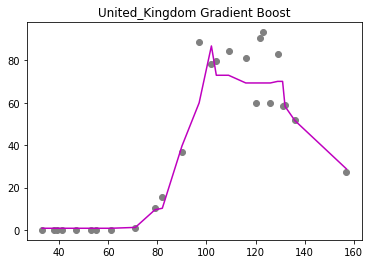

accuracy [0.93332632 0.86848168 0.95000703 0.94082682 0.91171054 0.91499075
 0.92345719 0.6461585  0.91053488 0.84746423]
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  2.0min


[09:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:25.0994
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:23.0288
[2]	validation_0-rmse:21.1681
[3]	validation_0-rmse:19.4835
[4]	validation_0-rmse:17.9776
[5]	validation_0-rmse:16.621
[6]	validation_0-rmse:15.4091
[7]	validation_0-rmse:14.3257
[8]	validation_0-rmse:13.3589
[9]	validation_0-rmse:12.5142
[10]	validation_0-rmse:11.7509
[11]	validation_0-rmse:11.0795
[12]	validation_0-rmse:10.4849
[13]	validation_0-rmse:9.83581
[14]	validation_0-rmse:9.32648
[15]	validation_0-rmse:8.88957
[16]	validation_0-rmse:8.53928
[17]	validation_0-rmse:8.18764
[18]	validation_0-rmse:7.91434
[19]	validation_0-rmse:7.65742
[20]	validation_0-rmse:7.37474
[21]	validation_0-rmse:7.12659
[22]	validation_0-rmse:6.84503
[23]	validation_0-rmse:6.60446
[24]	validation_0-rmse:6.3158
[25]	validation_0-rmse:6.13424
[26]	validati

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[09:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

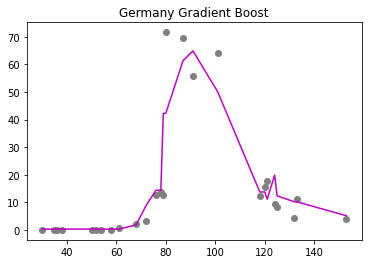

accuracy [0.92189057 0.6348656  0.92932766 0.8230539  0.86897937 0.1282315
 0.9514598  0.89277071 0.88647034 0.98431482]
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  2.0min


[09:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:57.6792
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:52.8952
[2]	validation_0-rmse:48.6383
[3]	validation_0-rmse:44.8062
[4]	validation_0-rmse:41.5149
[5]	validation_0-rmse:38.4101
[6]	validation_0-rmse:35.6645
[7]	validation_0-rmse:33.2
[8]	validation_0-rmse:30.9587
[9]	validation_0-rmse:28.9168
[10]	validation_0-rmse:26.9924
[11]	validation_0-rmse:25.3744
[12]	validation_0-rmse:23.9101
[13]	validation_0-rmse:22.6455
[14]	validation_0-rmse:21.5542
[15]	validation_0-rmse:20.5701
[16]	validation_0-rmse:19.6865
[17]	validation_0-rmse:18.9142
[18]	validation_0-rmse:18.2234
[19]	validation_0-rmse:17.3602
[20]	validation_0-rmse:16.6177
[21]	validation_0-rmse:15.672
[22]	validation_0-rmse:14.7639
[23]	validation_0-rmse:13.9619
[24]	validation_0-rmse:13.5059
[25]	validation_0-rmse:13.0786
[26]	validation

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.0min finished


[88]	validation_0-rmse:5.79751
[89]	validation_0-rmse:5.7459
[09:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:03] WARNING: /workspace/src/objective/regre

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[09:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


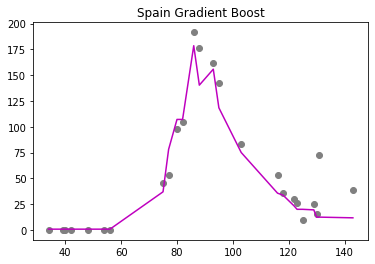

accuracy [0.95566093 0.80544816 0.91914672 0.97665567 0.91977601 0.98351728
 0.9101417  0.59642549 0.82322137 0.84605913]
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  2.0min


[09:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:39.1216
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:35.7656
[2]	validation_0-rmse:32.7432
[3]	validation_0-rmse:30.1088
[4]	validation_0-rmse:27.6692
[5]	validation_0-rmse:25.4617
[6]	validation_0-rmse:23.4335
[7]	validation_0-rmse:21.6025
[8]	validation_0-rmse:20.0176
[9]	validation_0-rmse:18.5374
[10]	validation_0-rmse:17.1559
[11]	validation_0-rmse:15.9328
[12]	validation_0-rmse:14.8678
[13]	validation_0-rmse:13.9762
[14]	validation_0-rmse:13.0347
[15]	validation_0-rmse:12.2788
[16]	validation_0-rmse:11.596
[17]	validation_0-rmse:11.024
[18]	validation_0-rmse:10.4899
[19]	validation_0-rmse:9.99621
[20]	validation_0-rmse:9.50727
[21]	validation_0-rmse:9.01641
[22]	validation_0-rmse:8.50006
[23]	validation_0-rmse:8.05093
[24]	validation_0-rmse:7.72808
[25]	validation_0-rmse:7.43097
[26]	validati

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[09:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

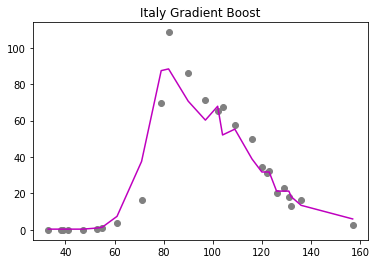

accuracy [0.90351012 0.95768685 0.91658243 0.98722353 0.96881968 0.99400084
 0.95607654 0.83577805 0.97553987 0.94522226]
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  2.0min


[09:37:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:52.9821
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:48.081
[2]	validation_0-rmse:43.6674
[3]	validation_0-rmse:39.6985
[4]	validation_0-rmse:36.1332
[5]	validation_0-rmse:32.9243
[6]	validation_0-rmse:30.0456
[7]	validation_0-rmse:27.464
[8]	validation_0-rmse:25.1607
[9]	validation_0-rmse:23.0963
[10]	validation_0-rmse:21.267
[11]	validation_0-rmse:19.6072
[12]	validation_0-rmse:18.158
[13]	validation_0-rmse:16.8641
[14]	validation_0-rmse:15.7113
[15]	validation_0-rmse:14.6969
[16]	validation_0-rmse:13.8034
[17]	validation_0-rmse:13.0281
[18]	validation_0-rmse:12.3457
[19]	validation_0-rmse:11.5842
[20]	validation_0-rmse:11.0601
[21]	validation_0-rmse:10.5977
[22]	validation_0-rmse:10.1961
[23]	validation_0-rmse:9.85493
[24]	validation_0-rmse:9.37942
[25]	validation_0-rmse:9.11295
[26]	validation

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.0min finished


[82]	validation_0-rmse:2.75508
[83]	validation_0-rmse:2.70306
[84]	validation_0-rmse:2.66633
[85]	validation_0-rmse:2.65154
[86]	validation_0-rmse:2.6249
[87]	validation_0-rmse:2.59557
[88]	validation_0-rmse:2.54893
[89]	validation_0-rmse:2.52239
[90]	validation_0-rmse:2.48772
[91]	validation_0-rmse:2.47349
[92]	validation_0-rmse:2.45076
[93]	validation_0-rmse:2.42361
[94]	validation_0-rmse:2.38628
[95]	validation_0-rmse:2.36575
[96]	validation_0-rmse:2.34367
[97]	validation_0-rmse:2.31516
[98]	validation_0-rmse:2.27822
[99]	validation_0-rmse:2.25524
[100]	validation_0-rmse:2.24184
[101]	validation_0-rmse:2.22333
[102]	validation_0-rmse:2.19849
[103]	validation_0-rmse:2.16492
[104]	validation_0-rmse:2.148
[105]	validation_0-rmse:2.12946
[106]	validation_0-rmse:2.10129
[107]	validation_0-rmse:2.08583
[108]	validation_0-rmse:2.06466
[109]	validation_0-rmse:2.0521
[110]	validation_0-rmse:2.03849
[111]	validation_0-rmse:2.01946
[112]	validation_0-rmse:1.99339
[113]	validation_0-rmse:1.9733

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[09:37:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:37:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:37:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:37:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


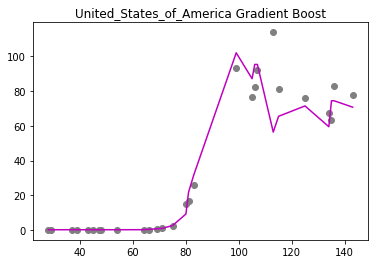

accuracy [0.98003597 0.96695033 0.94247278 0.14355318 0.97977416 0.80715824
 0.96764375 0.96176516 0.94930147 0.98438828]
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  1.9min


[09:39:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.96835
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:1.79582
[2]	validation_0-rmse:1.63985
[3]	validation_0-rmse:1.49791
[4]	validation_0-rmse:1.36864
[5]	validation_0-rmse:1.25359
[6]	validation_0-rmse:1.14736
[7]	validation_0-rmse:1.05184
[8]	validation_0-rmse:0.966083
[9]	validation_0-rmse:0.886858
[10]	validation_0-rmse:0.817074
[11]	validation_0-rmse:0.751882
[12]	validation_0-rmse:0.692033
[13]	validation_0-rmse:0.639557
[14]	validation_0-rmse:0.590607
[15]	validation_0-rmse:0.545373
[16]	validation_0-rmse:0.50629
[17]	validation_0-rmse:0.468847
[18]	validation_0-rmse:0.436996
[19]	validation_0-rmse:0.406523
[20]	validation_0-rmse:0.37794
[21]	validation_0-rmse:0.354075
[22]	validation_0-rmse:0.330292
[23]	validation_0-rmse:0.309624
[24]	validation_0-rmse:0.290506
[25]	validation_0-rmse:0.27

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.0min finished


[79]	validation_0-rmse:0.101515
[80]	validation_0-rmse:0.101398
[81]	validation_0-rmse:0.10104
[82]	validation_0-rmse:0.100822
[83]	validation_0-rmse:0.100503
[84]	validation_0-rmse:0.10041
[85]	validation_0-rmse:0.100118
[86]	validation_0-rmse:0.099985
[87]	validation_0-rmse:0.099723
[88]	validation_0-rmse:0.099649
[89]	validation_0-rmse:0.099409
[90]	validation_0-rmse:0.09934
[91]	validation_0-rmse:0.099121
[92]	validation_0-rmse:0.098973
[93]	validation_0-rmse:0.098778
[94]	validation_0-rmse:0.098724
[95]	validation_0-rmse:0.098546
[96]	validation_0-rmse:0.098499
[97]	validation_0-rmse:0.098336
[98]	validation_0-rmse:0.098261
[99]	validation_0-rmse:0.098113
[100]	validation_0-rmse:0.098072
[101]	validation_0-rmse:0.097937
[102]	validation_0-rmse:0.097858
[103]	validation_0-rmse:0.097738
[104]	validation_0-rmse:0.097706
[105]	validation_0-rmse:0.097595
[106]	validation_0-rmse:0.097567
[107]	validation_0-rmse:0.097465
[108]	validation_0-rmse:0.09743
[109]	validation_0-rmse:0.097338
[1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[09:39:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:39:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:39:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


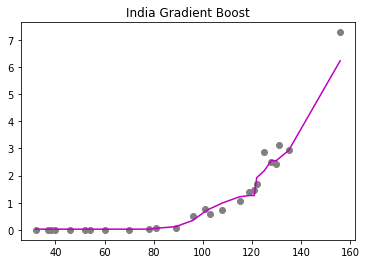

accuracy [0.99822104 0.98788961 0.98157671 0.98367697 0.99683672 0.95129474
 0.99296387 0.99340474 0.98888777 0.99644923]


In [13]:
for country in list_of_countries:
  dict_cases=country_cases[country]
  df_current=pd.DataFrame(dict_cases,columns=["cases","days"])
  X=df_current["days"].values.reshape(-1,1)
  y=df_current["cases"].values.reshape(-1,1)
  X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
  parameters = { 'gamma' : [0, 0.1, 0.3, 1], 'learning_rate' : [0.001, 0.01, 0.1], 
              'max_depth' : [2, 4, 6, 7, 12], 
              'n_estimators' : [10, 45, 90, 100, 150, 250],
              'nthread' : [-1], 'reg_alpha' : [1], 'reg_lambda' : [1], 'seed' : [10] }
  bst = xgb.XGBRegressor()
  xgb_grid = GridSearchCV(bst,
                        parameters,
                        cv=5,
                        n_jobs=-1,
                        verbose=True,
                        )
  xgb_grid.fit(X_train, y_train, eval_set=[(X_train, y_train)], early_stopping_rounds=200)
  y_pred=xgb_grid.predict(X_test)
  kfold = KFold(n_splits=10, random_state=7)
  results = cross_val_score(bst, X_train, y_train, cv=kfold)
  plt.scatter(X_test, y_test,  color='gray') 
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(X_test,y_pred), key=sort_axis)
  X_test, y_pred_= zip(*sorted_zip)
  plt.plot(X_test, y_pred_, color='m')
  plt.title(country+" Gradient Boost")
  plt.show()
  print("accuracy",results)

DEATHS

In [8]:
grouped=covid_records.groupby('countriesAndTerritories')
country_population = {}
country_deaths={}
for country in list_of_countries:
  country_population[country]=list(grouped.get_group(country)['popData2018'])[0]
  list_deaths=list(abs(covid_records["deaths"].loc[covid_records["countriesAndTerritories"]==country]))[::-1]
  length=len(list_deaths)
  flag =0
  for number in list_deaths:
    if number==0:
      continue
    else:
      flag=list_deaths.index(number)
      break
  list_deaths=list_deaths[flag::]
  normalised_list_deaths=[]
  for i in list_deaths:
    normalised_list_deaths.append((i*1000000)/country_population[country])
  list_days=list(range(flag,length))
  country_deaths[country]={"deaths":normalised_list_deaths,"days":list_days}

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.8min


[09:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7.20843
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:6.6024
[2]	validation_0-rmse:6.04967
[3]	validation_0-rmse:5.5563
[4]	validation_0-rmse:5.11604
[5]	validation_0-rmse:4.72793
[6]	validation_0-rmse:4.37631
[7]	validation_0-rmse:4.07698
[8]	validation_0-rmse:3.7991
[9]	validation_0-rmse:3.55527
[10]	validation_0-rmse:3.34056
[11]	validation_0-rmse:3.16027
[12]	validation_0-rmse:2.98981
[13]	validation_0-rmse:2.83219
[14]	validation_0-rmse:2.69573
[15]	validation_0-rmse:2.58544
[16]	validation_0-rmse:2.48133
[17]	validation_0-rmse:2.39228
[18]	validation_0-rmse:2.31645
[19]	validation_0-rmse:2.25733
[20]	validation_0-rmse:2.19636
[21]	validation_0-rmse:2.14572
[22]	validation_0-rmse:2.09939
[23]	validation_0-rmse:2.06484
[24]	validation_0-rmse:2.02829
[25]	validation_0-rmse:1.99673
[26]	validatio

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[09:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

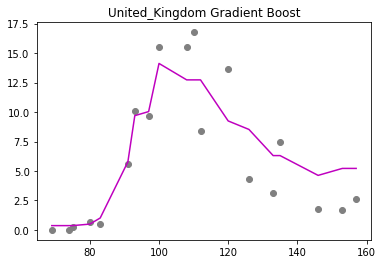

accuracy [ 0.56031489  0.79902197  0.89623598  0.95851679  0.77358425  0.79860098
  0.8275249   0.61081085  0.73100226 -0.0060582 ]
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  2.0min


[09:16:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.094
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:1.02279
[2]	validation_0-rmse:0.954995
[3]	validation_0-rmse:0.895773
[4]	validation_0-rmse:0.842756
[5]	validation_0-rmse:0.796189
[6]	validation_0-rmse:0.757907
[7]	validation_0-rmse:0.720851
[8]	validation_0-rmse:0.688965
[9]	validation_0-rmse:0.660909
[10]	validation_0-rmse:0.630115
[11]	validation_0-rmse:0.603358
[12]	validation_0-rmse:0.583192
[13]	validation_0-rmse:0.56434
[14]	validation_0-rmse:0.550305
[15]	validation_0-rmse:0.53274
[16]	validation_0-rmse:0.521192
[17]	validation_0-rmse:0.510204
[18]	validation_0-rmse:0.499922
[19]	validation_0-rmse:0.491568
[20]	validation_0-rmse:0.480767
[21]	validation_0-rmse:0.470692
[22]	validation_0-rmse:0.46524
[23]	validation_0-rmse:0.459473
[24]	validation_0-rmse:0.455594
[25]	validation_0-rmse:0

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.1min finished


[100]	validation_0-rmse:0.314505
[101]	validation_0-rmse:0.313869
[102]	validation_0-rmse:0.312609
[103]	validation_0-rmse:0.312518
[104]	validation_0-rmse:0.312143
[105]	validation_0-rmse:0.311653
[106]	validation_0-rmse:0.311085
[107]	validation_0-rmse:0.309924
[108]	validation_0-rmse:0.30958
[109]	validation_0-rmse:0.309063
[110]	validation_0-rmse:0.307995
[111]	validation_0-rmse:0.30757
[112]	validation_0-rmse:0.307253
[113]	validation_0-rmse:0.3071
[114]	validation_0-rmse:0.306964
[115]	validation_0-rmse:0.306886
[116]	validation_0-rmse:0.305913
[117]	validation_0-rmse:0.305443
[118]	validation_0-rmse:0.305153
[119]	validation_0-rmse:0.304768
[120]	validation_0-rmse:0.303872
[121]	validation_0-rmse:0.303452
[122]	validation_0-rmse:0.303186
[123]	validation_0-rmse:0.302844
[124]	validation_0-rmse:0.302019
[125]	validation_0-rmse:0.301959
[126]	validation_0-rmse:0.301583
[127]	validation_0-rmse:0.300824
[128]	validation_0-rmse:0.30058
[129]	validation_0-rmse:0.300276
[130]	validatio

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[09:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


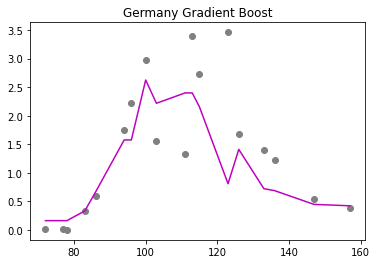

accuracy [ 0.85123461  0.21662859 -0.26373675  0.90997834 -0.26637117  0.17263331
  0.76582617  0.87546657  0.91938484  0.88648271]
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  2.0min


[09:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9.63816
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:9.03657
[2]	validation_0-rmse:8.51098
[3]	validation_0-rmse:8.04791
[4]	validation_0-rmse:7.6477
[5]	validation_0-rmse:7.29656
[6]	validation_0-rmse:6.99593
[7]	validation_0-rmse:6.72243
[8]	validation_0-rmse:6.48148
[9]	validation_0-rmse:6.26197
[10]	validation_0-rmse:6.08236
[11]	validation_0-rmse:5.91211
[12]	validation_0-rmse:5.70777
[13]	validation_0-rmse:5.56485
[14]	validation_0-rmse:5.38572
[15]	validation_0-rmse:5.27018
[16]	validation_0-rmse:5.19332
[17]	validation_0-rmse:5.0836
[18]	validation_0-rmse:4.929
[19]	validation_0-rmse:4.83668
[20]	validation_0-rmse:4.69562
[21]	validation_0-rmse:4.64373
[22]	validation_0-rmse:4.51529
[23]	validation_0-rmse:4.44146
[24]	validation_0-rmse:4.40053
[25]	validation_0-rmse:4.28236
[26]	validation

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[09:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

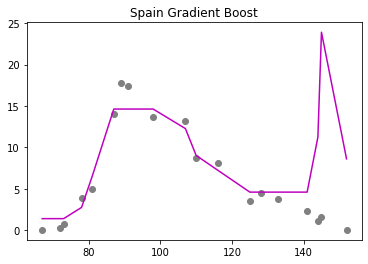

accuracy [ 0.38051776 -0.22988434 -0.69207014  0.90712719  0.94457085  0.3890606
  0.19565869  0.90318075  0.8127022  -0.20112997]
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  2.0min


[09:20:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.92801
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:5.40319
[2]	validation_0-rmse:4.92752
[3]	validation_0-rmse:4.49471
[4]	validation_0-rmse:4.1017
[5]	validation_0-rmse:3.74967
[6]	validation_0-rmse:3.43211
[7]	validation_0-rmse:3.14159
[8]	validation_0-rmse:2.87942
[9]	validation_0-rmse:2.64482
[10]	validation_0-rmse:2.43235
[11]	validation_0-rmse:2.24173
[12]	validation_0-rmse:2.07115
[13]	validation_0-rmse:1.91584
[14]	validation_0-rmse:1.77961
[15]	validation_0-rmse:1.65282
[16]	validation_0-rmse:1.54139
[17]	validation_0-rmse:1.44332
[18]	validation_0-rmse:1.35495
[19]	validation_0-rmse:1.2799
[20]	validation_0-rmse:1.20873
[21]	validation_0-rmse:1.1475
[22]	validation_0-rmse:1.09252
[23]	validation_0-rmse:1.04277
[24]	validation_0-rmse:1.00217
[25]	validation_0-rmse:0.960913
[26]	validati

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.1min finished


[87]	validation_0-rmse:0.683417
[88]	validation_0-rmse:0.683415
[89]	validation_0-rmse:0.683414
[90]	validation_0-rmse:0.683412
[91]	validation_0-rmse:0.683411
[92]	validation_0-rmse:0.68341
[93]	validation_0-rmse:0.683409
[94]	validation_0-rmse:0.683408
[95]	validation_0-rmse:0.683408
[96]	validation_0-rmse:0.683407
[97]	validation_0-rmse:0.683406
[98]	validation_0-rmse:0.683406
[99]	validation_0-rmse:0.683405
[100]	validation_0-rmse:0.683405
[101]	validation_0-rmse:0.683404
[102]	validation_0-rmse:0.683404
[103]	validation_0-rmse:0.683403
[104]	validation_0-rmse:0.683403
[105]	validation_0-rmse:0.683403
[106]	validation_0-rmse:0.683403
[107]	validation_0-rmse:0.683402
[108]	validation_0-rmse:0.683402
[109]	validation_0-rmse:0.683402
[110]	validation_0-rmse:0.683402
[111]	validation_0-rmse:0.683402
[112]	validation_0-rmse:0.683402
[113]	validation_0-rmse:0.683401
[114]	validation_0-rmse:0.683401
[115]	validation_0-rmse:0.683401
[116]	validation_0-rmse:0.683401
[117]	validation_0-rmse:

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[09:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


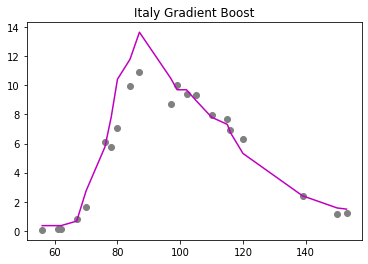

accuracy [0.7511436  0.87998163 0.97557454 0.97371754 0.8953814  0.86232476
 0.8199116  0.93178329 0.80365259 0.92898728]
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  2.0min


[09:22:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.17108
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:4.1371
[2]	validation_0-rmse:4.10349
[3]	validation_0-rmse:4.07027
[4]	validation_0-rmse:4.03743
[5]	validation_0-rmse:4.00495
[6]	validation_0-rmse:3.97266
[7]	validation_0-rmse:3.94091
[8]	validation_0-rmse:3.90933
[9]	validation_0-rmse:3.87812
[10]	validation_0-rmse:3.84743
[11]	validation_0-rmse:3.81692
[12]	validation_0-rmse:3.78675
[13]	validation_0-rmse:3.7571
[14]	validation_0-rmse:3.72762
[15]	validation_0-rmse:3.69848
[16]	validation_0-rmse:3.66983
[17]	validation_0-rmse:3.64135
[18]	validation_0-rmse:3.6132
[19]	validation_0-rmse:3.58554
[20]	validation_0-rmse:3.55803
[21]	validation_0-rmse:3.53068
[22]	validation_0-rmse:3.50396
[23]	validation_0-rmse:3.47723
[24]	validation_0-rmse:3.45081
[25]	validation_0-rmse:3.42487
[26]	validatio

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.0min finished


[94]	validation_0-rmse:2.16737
[95]	validation_0-rmse:2.15609
[96]	validation_0-rmse:2.14445
[97]	validation_0-rmse:2.13301
[98]	validation_0-rmse:2.12168
[99]	validation_0-rmse:2.11097
[100]	validation_0-rmse:2.09993
[101]	validation_0-rmse:2.08907
[102]	validation_0-rmse:2.07831
[103]	validation_0-rmse:2.06815
[104]	validation_0-rmse:2.05767
[105]	validation_0-rmse:2.04737
[106]	validation_0-rmse:2.03717
[107]	validation_0-rmse:2.02754
[108]	validation_0-rmse:2.01761
[109]	validation_0-rmse:2.00781
[110]	validation_0-rmse:1.99826
[111]	validation_0-rmse:1.98873
[112]	validation_0-rmse:1.97971
[113]	validation_0-rmse:1.97043
[114]	validation_0-rmse:1.96131
[115]	validation_0-rmse:1.95227
[116]	validation_0-rmse:1.9434
[117]	validation_0-rmse:1.93498
[118]	validation_0-rmse:1.92631
[119]	validation_0-rmse:1.91776
[120]	validation_0-rmse:1.90969
[121]	validation_0-rmse:1.90137
[122]	validation_0-rmse:1.89322
[123]	validation_0-rmse:1.88513
[124]	validation_0-rmse:1.87749
[125]	validatio

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[09:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


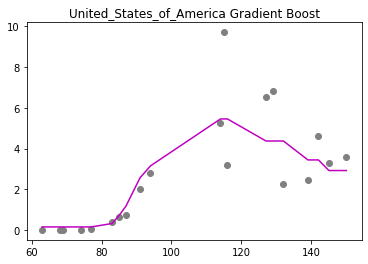

accuracy [0.24139841 0.76697332 0.95001585 0.90912297 0.92415571 0.81097397
 0.9663744  0.45792944 0.6377474  0.1277833 ]
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  1.9min


[09:24:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.402365
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.364974
[2]	validation_0-rmse:0.331348
[3]	validation_0-rmse:0.301124
[4]	validation_0-rmse:0.273973
[5]	validation_0-rmse:0.249601
[6]	validation_0-rmse:0.227676
[7]	validation_0-rmse:0.208008
[8]	validation_0-rmse:0.19038
[9]	validation_0-rmse:0.174378
[10]	validation_0-rmse:0.160124
[11]	validation_0-rmse:0.14718
[12]	validation_0-rmse:0.135614
[13]	validation_0-rmse:0.125264
[14]	validation_0-rmse:0.115895
[15]	validation_0-rmse:0.107584
[16]	validation_0-rmse:0.099907
[17]	validation_0-rmse:0.09316
[18]	validation_0-rmse:0.086957
[19]	validation_0-rmse:0.081125
[20]	validation_0-rmse:0.07609
[21]	validation_0-rmse:0.071245
[22]	validation_0-rmse:0.067106
[23]	validation_0-rmse:0.063086
[24]	validation_0-rmse:0.059691
[25]	validation_0-rms

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.0min finished


[89]	validation_0-rmse:0.024699
[90]	validation_0-rmse:0.024693
[91]	validation_0-rmse:0.024688
[92]	validation_0-rmse:0.024684
[93]	validation_0-rmse:0.024679
[94]	validation_0-rmse:0.024676
[95]	validation_0-rmse:0.024672
[96]	validation_0-rmse:0.024669
[97]	validation_0-rmse:0.024667
[98]	validation_0-rmse:0.024664
[99]	validation_0-rmse:0.024662
[100]	validation_0-rmse:0.02466
[101]	validation_0-rmse:0.024658
[102]	validation_0-rmse:0.024657
[103]	validation_0-rmse:0.024655
[104]	validation_0-rmse:0.024654
[105]	validation_0-rmse:0.024653
[106]	validation_0-rmse:0.024651
[107]	validation_0-rmse:0.024651
[108]	validation_0-rmse:0.02465
[109]	validation_0-rmse:0.024649
[110]	validation_0-rmse:0.024648
[111]	validation_0-rmse:0.024648
[112]	validation_0-rmse:0.024647
[113]	validation_0-rmse:0.024646
[114]	validation_0-rmse:0.024646
[115]	validation_0-rmse:0.024646
[116]	validation_0-rmse:0.024645
[117]	validation_0-rmse:0.024645
[118]	validation_0-rmse:0.024645
[119]	validation_0-rmse

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[09:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


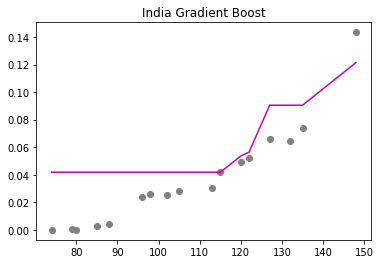

accuracy [0.81956759 0.59751322 0.87736703 0.71427624 0.9810998  0.9808165
 0.94120237 0.96550493 0.9273973  0.95430234]


In [10]:
for country in list_of_countries:
  dict_deaths=country_deaths[country]
  df_current=pd.DataFrame(dict_deaths,columns=["deaths","days"])
  X=df_current["days"].values.reshape(-1,1)
  y=df_current["deaths"].values.reshape(-1,1)
  X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
  parameters = { 'gamma' : [0, 0.1, 0.3, 1], 'learning_rate' : [0.001, 0.01, 0.1], 
              'max_depth' : [2, 4, 6, 7, 12], 
              'n_estimators' : [10, 45, 90, 100, 150, 250],
              'nthread' : [-1], 'reg_alpha' : [1], 'reg_lambda' : [1], 'seed' : [10] }
  bst = xgb.XGBRegressor()
  xgb_grid = GridSearchCV(bst,
                        parameters,
                        cv=5,
                        n_jobs=-1,
                        verbose=True,
                        )
  xgb_grid.fit(X_train, y_train, eval_set=[(X_train, y_train)], early_stopping_rounds=200)
  y_pred=xgb_grid.predict(X_test)
  kfold = KFold(n_splits=10, random_state=7)
  results = cross_val_score(bst, X_train, y_train, cv=kfold)
  plt.scatter(X_test, y_test,  color='gray') 
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(X_test,y_pred), key=sort_axis)
  X_test, y_pred_= zip(*sorted_zip)
  plt.plot(X_test, y_pred_, color='m')
  plt.title(country+" Gradient Boost")
  plt.show()
  print("accuracy",results)